In [66]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt
# import PyDynamic as pd

#### Функции

In [67]:
# Диаграмма нулей и полюсов
def ZerosPolesDiagram(z, p):
    fg, ax = plt.subplots(figsize=(5, 5))
    circle = plt.Circle(xy=(0,0),radius=1, edgecolor='gray', facecolor='white', linestyle='--')
    ax.add_patch(circle)
    ax.scatter(z.real, z.imag, marker='o', facecolor='white', edgecolor='C0', s=100)
    ax.scatter(p.real, p.imag, marker='x', s=100)
    ax.axhline(y=0, color="black", linestyle="-")
    ax.axvline(x=0, color="black", linestyle="-")
    ax.grid()
    plt.show()

# Расчет АЧХ
def FrequencyResponse(h):
    with np.errstate(divide='ignore'): # suppress RuntimeWarning: divide by zero encountered in log10
        return 20 * np.log10(abs(h))

# Расчет ФЧХ
def PhaseResponse(h):
    return np.unwrap(np.angle(h))

# Графики АЧХ и ФЧХ
def FRPRDiagram(w, fr, pr, logx = False, **kwargs):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), layout='constrained')

    if (logx):
        ax[0].semilogx(w, fr, 'b')
    else:
        ax[0].plot(w, fr, 'b')
    ax[0].set_ylabel('Амплитуда, дБ', color='b')
    ax[0].set_xlabel('Частота, Гц')
    ax[0].grid(True)

    if (logx):
        ax[1].semilogx(w, pr, 'g')
    else:
        ax[1].plot(w, pr, 'g')
    ax[1].set_ylabel('Фаза, рад', color='g')
    ax[1].set_xlabel('Частота, Гц')
    ax[1].grid(True)

    if 'title' in kwargs.keys():
        fig.suptitle(kwargs['title'])

    if 'ylimits' in kwargs.keys():
        ax[0].set_ylim(kwargs['ylimits'])

    if 'xvlines' in kwargs.keys():
        for xvline in kwargs['xvlines']:
            for axis in ax:
                axis.axvline(x=xvline, color='gray', linestyle='dashed', linewidth=1.5)
    
    plt.show()

# Оболочка для отрисовки графика при вызове функций freqs и freqz в линейном масштабе
def FRPRDiag (w, h):
    FRPRDiagram(w, FrequencyResponse(h), PhaseResponse(h), logx=False)

# Оболочка для отрисовки графика при вызове функций freqs и freqz в логарифмическом масштабе
def FRPRDiagLog (w, h):
    FRPRDiagram(w, FrequencyResponse(h), PhaseResponse(h), logx=True)


#### Расчет фильтра Баттерворта нижних частот

Порядок фильтра: 42
Частота: 3500.1915594095


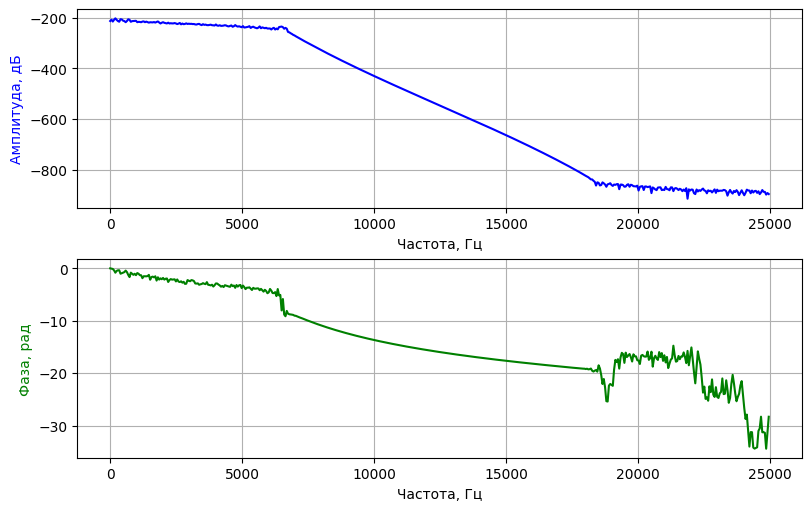

In [68]:
# Расчет порядка цифрового фильтра Баттерворта
# Возвращаемые значения:
# ord - наименьший порядок фильтра, соответствующий заданным параметрам
# wn - натуральная частота Баттерворта
# Параметры:
# wp - частота среза
# ws - частота задержания
# gpass - максимально-допустимые потери в полосе пропускания
# gstop - минимальное затухание в полосе подавления
# analog - задает аналоговый или цифровой фильтр
#    True - аналоговый фильтр
#    False - цифровой фильтр
# fs - частота дискретизации цифрового фильтра

ord, wn = sp.buttord(wp=3500, ws=4000, gpass=3, gstop=50, fs=50000)
print(f'Порядок фильтра: {ord}\nЧастота: {wn}')

# Расчет фильтра Баттерворта
# Возвращаемые значения:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# Параметры:
# N - порядок фильтра
# btype - тип фильтра:
#    'lowpass' - фильтр нижних частот
#    'highpass' - фильтр верхних частот
#    'bandpass' - полосовой фильтр
#    'bandstop' - режекторный фильтр
# analog - задает аналоговый или цифровой фильтр
#    True - аналоговый фильтр
#    False - цифровой фильтр
# output - тип возвращаемых значений:
#    'ba' - коэффициенты прямых и обратных связей
#    'zpk' - значения нулей, полюсов и коэффициент усиления
#    'sos' - массив коэффициентов секций второго порядка
# fs - частота дискретизации цифрового фильтра
[b, a] = sp.butter(N=ord, Wn=wn, btype="lowpass", analog=False, output='ba', fs=50000)

# Функция freqz_zpk возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# fs - частота дискретизации
# plot - функция отрисовки графиков
w, h = sp.freqz(b=b, a=a, fs=50000, plot=FRPRDiag)

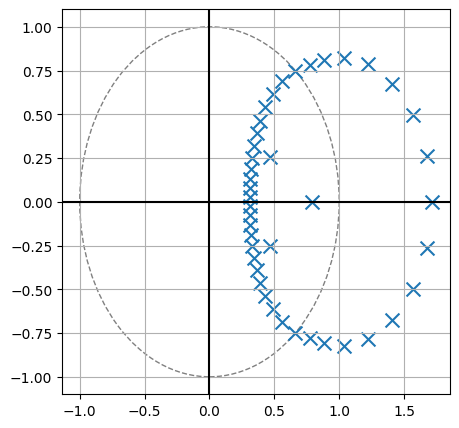

In [69]:
# Преобразование фильтра, представленного в виде коэффициентов прямых и обратных связей
# в форму значений нулей, полюсов и коэффициента усиления
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
z, p, k = sp.tf2zpk(b=b, a=a)

ZerosPolesDiagram(z=z, p=p)

Результаты расчета: 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


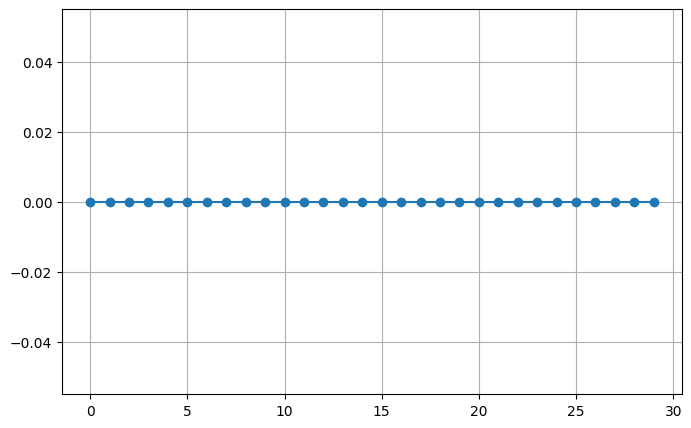

In [70]:
# Импульсная характеристика фильтра
# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# 1 - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
t, y = sp.dimpulse(system=(b,a,1), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(t,*y, linefmt='C0--', basefmt='C0-')
# # ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

#### Расчет фильтра Чебышева 1 нижних частот

Порядок фильтра: 12
Частота: 3500.0000000000005


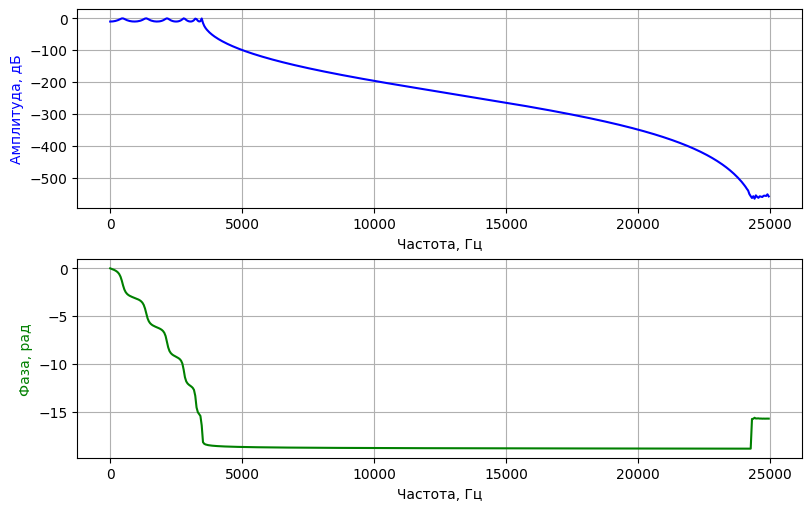

In [71]:
# Расчет порядка цифрового фильтра Чебышева 1
# Возвращаемые значения:
# ord - наименьший порядок фильтра, соответствующий заданным параметрам
# wn - натуральная частота Чебышева
# Параметры:
# wp - частота среза
# ws - частота задержания
# gpass - максимально-допустимые потери в полосе пропускания
# gstop - минимальное затухание в полосе подавления
# analog - задает аналоговый или цифровой фильтр
#    True - аналоговый фильтр
#    False - цифровой фильтр
# fs - частота дискретизации цифрового фильтра

ord, wn = sp.cheb1ord(wp=3500, ws=4000, gpass=3, gstop=50, fs=50000)
print(f'Порядок фильтра: {ord}\nЧастота: {wn}')

# Расчет фильтра Чебышева 1
# Возвращаемые значения:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# Параметры:
# N - порядок фильтра
# rp - допустимый уровень пульсаций в полосе пропускания
# btype - тип фильтра:
#    'lowpass' - фильтр нижних частот
#    'highpass' - фильтр верхних частот
#    'bandpass' - полосовой фильтр
#    'bandstop' - режекторный фильтр
# analog - задает аналоговый или цифровой фильтр
#    True - аналоговый фильтр
#    False - цифровой фильтр
# output - тип возвращаемых значений:
#    'ba' - коэффициенты прямых и обратных связей
#    'zpk' - значения нулей, полюсов и коэффициент усиления
#    'sos' - массив коэффициентов секций второго порядка
# fs - частота дискретизации цифрового фильтра
[b, a] = sp.cheby1(N=ord, rp=10, Wn=wn, btype="lowpass", analog=False, output='ba', fs=50000)

# Функция freqz_zpk возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# fs - частота дискретизации
# plot - функция отрисовки графиков
w, h = sp.freqz(b=b, a=a, fs=50000, plot=FRPRDiag)

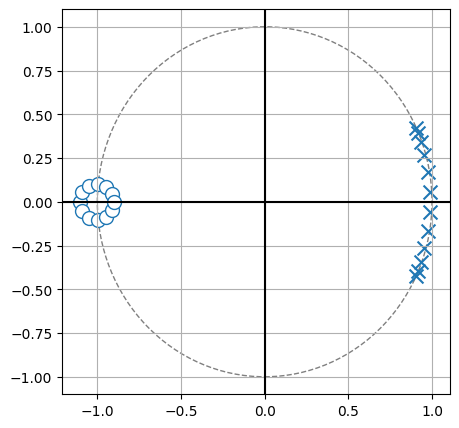

In [72]:
# Преобразование фильтра, представленного в виде коэффициентов прямых и обратных связей
# в форму значений нулей, полюсов и коэффициента усиления
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
z, p, k = sp.tf2zpk(b=b, a=a)

ZerosPolesDiagram(z=z, p=p)

Результаты расчета: 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0001 0.0002 0.0003 0.0006 0.001 0.0017 0.0027 0.0042 0.0063 0.009 0.0125 0.0168 0.0218 0.0273 0.0332 0.039 0.0444 0.0488 0.0518


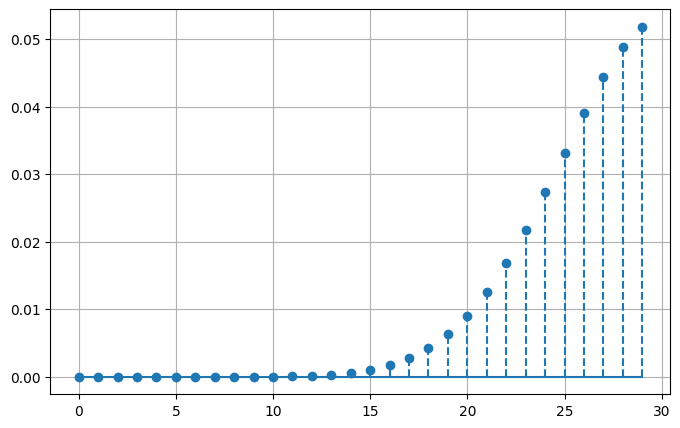

In [73]:
# Импульсная характеристика фильтра
# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# 1 - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
t, y = sp.dimpulse(system=(b,a,1), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(t,*y, linefmt='C0--', basefmt='C0-')
# # ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

#### Расчет фильтра Чебышева 2 нижних частот

Порядок фильтра: 12
Частота: 3997.982534950636


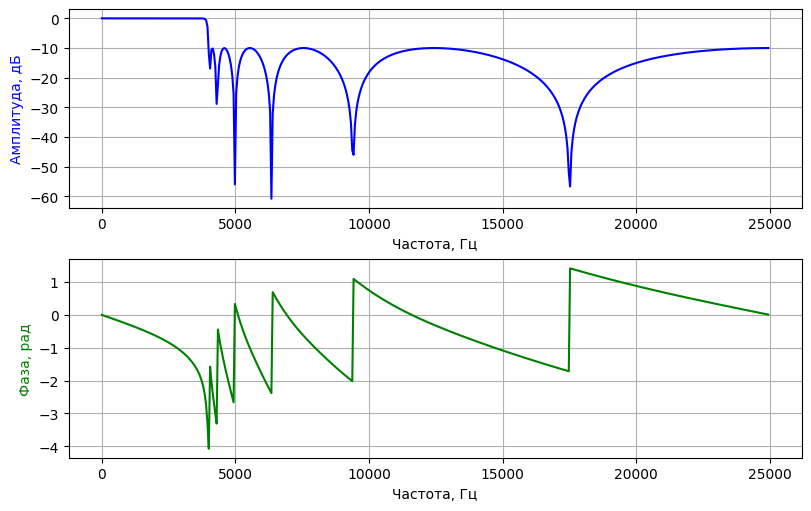

In [74]:
# Расчет порядка цифрового фильтра Чебышева 2
# Возвращаемые значения:
# ord - наименьший порядок фильтра, соответствующий заданным параметрам
# wn - натуральная частота Чебышева
# Параметры:
# wp - частота среза
# ws - частота задержания
# gpass - максимально-допустимые потери в полосе пропускания
# gstop - минимальное затухание в полосе подавления
# analog - задает аналоговый или цифровой фильтр
#    True - аналоговый фильтр
#    False - цифровой фильтр
# fs - частота дискретизации цифрового фильтра

ord, wn = sp.cheb2ord(wp=3500, ws=4000, gpass=3, gstop=50, fs=50000)
print(f'Порядок фильтра: {ord}\nЧастота: {wn}')

# Расчет фильтра Чебышева 2
# Возвращаемые значения:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# Параметры:
# N - порядок фильтра
# rs - допустимый уровень пульсаций в полосе подавления
# btype - тип фильтра:
#    'lowpass' - фильтр нижних частот
#    'highpass' - фильтр верхних частот
#    'bandpass' - полосовой фильтр
#    'bandstop' - режекторный фильтр
# analog - задает аналоговый или цифровой фильтр
#    True - аналоговый фильтр
#    False - цифровой фильтр
# output - тип возвращаемых значений:
#    'ba' - коэффициенты прямых и обратных связей
#    'zpk' - значения нулей, полюсов и коэффициент усиления
#    'sos' - массив коэффициентов секций второго порядка
# fs - частота дискретизации цифрового фильтра
[b, a] = sp.cheby2(N=ord, rs=10, Wn=wn, btype="lowpass", analog=False, output='ba', fs=50000)

# Функция freqz_zpk возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# fs - частота дискретизации
# plot - функция отрисовки графиков
w, h = sp.freqz(b=b, a=a, fs=50000, plot=FRPRDiag)

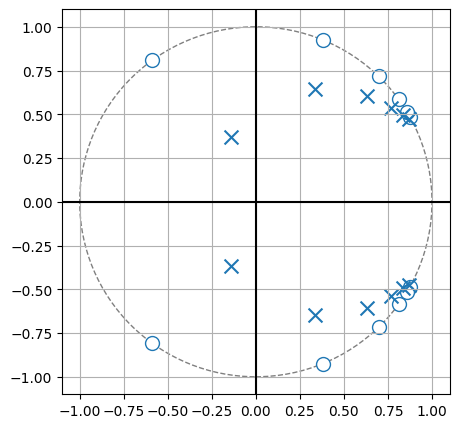

In [75]:
# Преобразование фильтра, представленного в виде коэффициентов прямых и обратных связей
# в форму значений нулей, полюсов и коэффициента усиления
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
z, p, k = sp.tf2zpk(b=b, a=a)

ZerosPolesDiagram(z=z, p=p)

Результаты расчета: 
0.2171 0.1147 0.1644 0.0845 0.2239 0.1109 0.0628 0.0959 0.0791 0.0116 -0.0461 -0.0601 -0.0418 -0.0235 -0.0219 -0.0283 -0.0249 -0.0047 0.0236 0.0443 0.0471 0.0323 0.0087 -0.013 -0.0254 -0.0266 -0.0197 -0.0102 -0.0026 0.0014


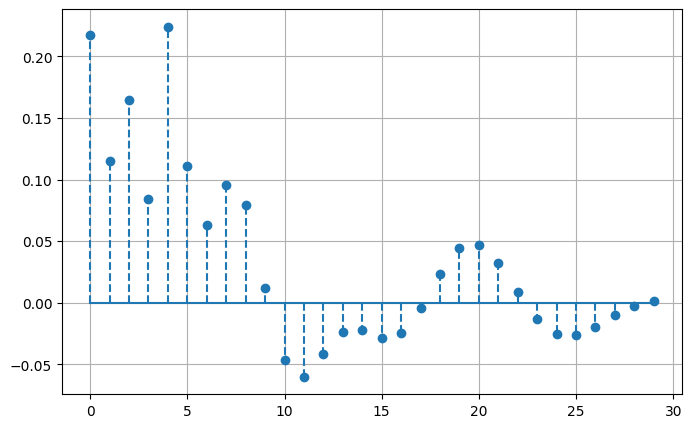

In [76]:
# Импульсная характеристика фильтра
# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# 1 - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
t, y = sp.dimpulse(system=(b,a,1), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(t,*y, linefmt='C0--', basefmt='C0-')
# # ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

#### Расчет эллиптического фильтра нижних частот

Порядок фильтра: 6
Частота: 3500.0000000000005


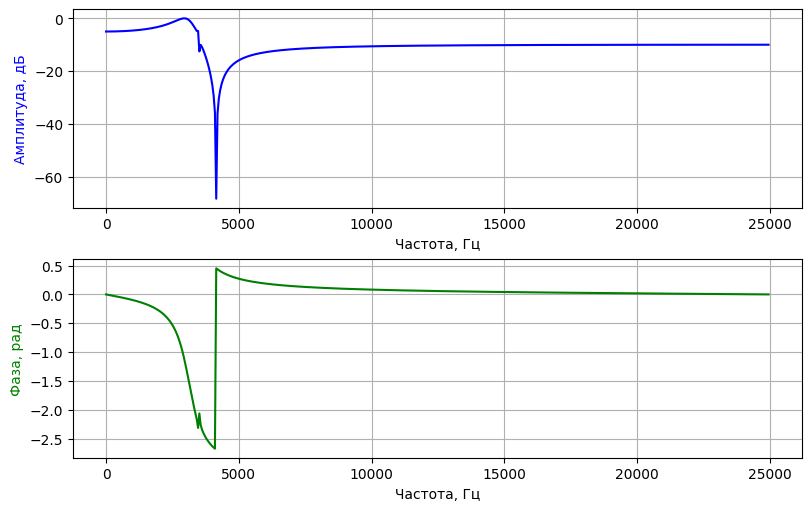

In [77]:
# Расчет порядка цифрового эллиптического фильтра
# Возвращаемые значения:
# ord - наименьший порядок фильтра, соответствующий заданным параметрам
# wn - натуральная частота
# Параметры:
# wp - частота среза
# ws - частота задержания
# gpass - максимально-допустимые потери в полосе пропускания
# gstop - минимальное затухание в полосе подавления
# analog - задает аналоговый или цифровой фильтр
#    True - аналоговый фильтр
#    False - цифровой фильтр
# fs - частота дискретизации цифрового фильтра

ord, wn = sp.ellipord(wp=3500, ws=4000, gpass=3, gstop=50, fs=50000)
print(f'Порядок фильтра: {ord}\nЧастота: {wn}')

# Расчет эллиптического фильтра
# Возвращаемые значения:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# Параметры:
# N - порядок фильтра
# rp - допустимый уровень пульсаций в полосе пропускания
# rs - допустимый уровень пульсаций в полосе подавления
# btype - тип фильтра:
#    'lowpass' - фильтр нижних частот
#    'highpass' - фильтр верхних частот
#    'bandpass' - полосовой фильтр
#    'bandstop' - режекторный фильтр
# analog - задает аналоговый или цифровой фильтр
#    True - аналоговый фильтр
#    False - цифровой фильтр
# output - тип возвращаемых значений:
#    'ba' - коэффициенты прямых и обратных связей
#    'zpk' - значения нулей, полюсов и коэффициент усиления
#    'sos' - массив коэффициентов секций второго порядка
# fs - частота дискретизации цифрового фильтра
[b, a] = sp.ellip(N=ord, rp=5, rs=10, Wn=wn, btype="lowpass", analog=False, output='ba', fs=50000)

# Функция freqz_zpk возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# fs - частота дискретизации
# plot - функция отрисовки графиков
w, h = sp.freqz(b=b, a=a, fs=50000, plot=FRPRDiag)

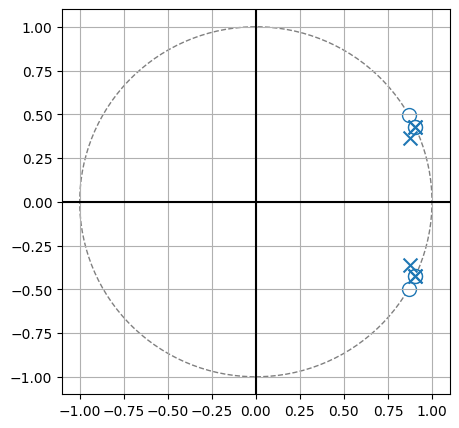

In [78]:
# Преобразование фильтра, представленного в виде коэффициентов прямых и обратных связей
# в форму значений нулей, полюсов и коэффициента усиления
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
z, p, k = sp.tf2zpk(b=b, a=a)

ZerosPolesDiagram(z=z, p=p)

Результаты расчета: 
0.3091 0.0055 0.0412 0.0672 0.0808 0.0812 0.0697 0.0492 0.0235 -0.003 -0.0264 -0.0436 -0.0527 -0.0532 -0.0459 -0.0326 -0.0159 0.0015 0.0169 0.0283 0.0345 0.035 0.0304 0.0217 0.0108 -0.0006 -0.0109 -0.0185 -0.0227 -0.0232


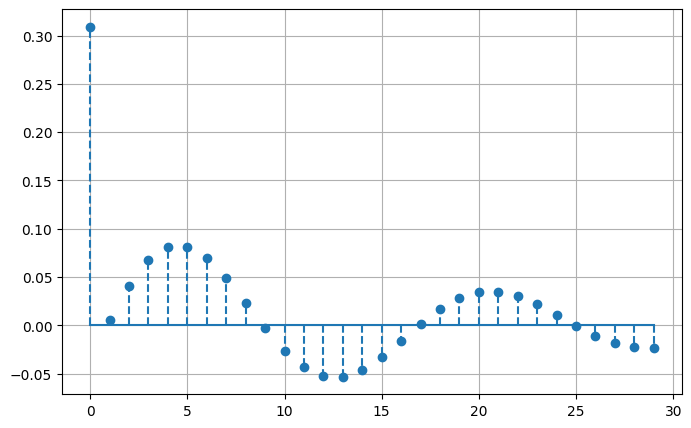

In [79]:
# Импульсная характеристика фильтра
# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# 1 - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
t, y = sp.dimpulse(system=(b,a,1), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(t,*y, linefmt='C0--', basefmt='C0-')
# # ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()